In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_absorption(name):
    df = pd.DataFrame(pd.read_csv(f'.\\Scan - Lambda 850 Monday, January 01, 2007 11_53 PM Pacific Standard Time\\{name}.Sample.Raw.csv'))
    max_absorption = max(df[' A'])
    
    return max_absorption

In [3]:
names = ['0.5 ppm std', '1 ppm std', '3 ppm std', '4 ppm std ', '5 ppm std ', 'sample 1', 'sample 2', 'sample 3', 'sample 4', 'sample 5']

absorption_data = np.array([get_absorption(i) for i in names])
absorption_data

array([0.091824, 0.228992, 0.691236, 0.855079, 1.074282, 0.217052,
       0.238502, 0.490278, 0.600424, 0.956732])

In [4]:
std_data = absorption_data[:5]
sample_data = absorption_data[5:]

Text(0.5, 1.0, 'Calibration Curve')

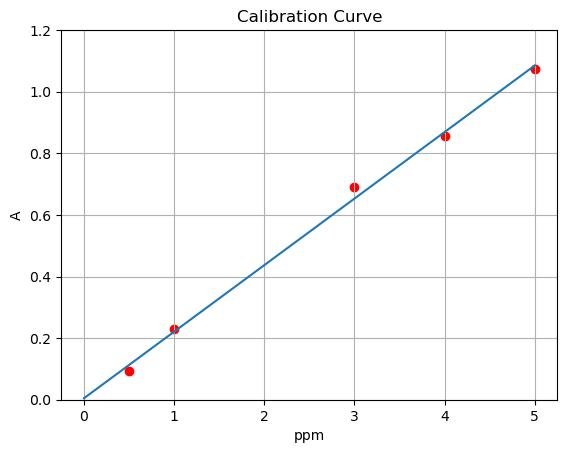

In [5]:
fig, ax = plt.subplots()

x = np.linspace(0, 5, 1000)
f = lambda x: a*x+b

a, b = np.polyfit([0.5, 1, 3, 4, 5], std_data, 1)
ax.scatter([0.5, 1, 3, 4, 5], std_data, marker='o', color='r')
ax.plot(x, f(x))

ax.set_ylim(0, 1.2)
ax.grid()
ax.set_xlabel('ppm')
ax.set_ylabel('A')
ax.set_title('Calibration Curve')
# fig.show()

In [6]:
f_1 = lambda y: (y - b)/a

C = np.array([f_1(i) for i in sample_data])
C

array([0.98226558, 1.08151764, 2.2465194 , 2.75617991, 4.40486543])

In [7]:
result = pd.DataFrame({
    'Concentration': C,
})

result.index = ['1', '2', '3', '4', '5']
result

,Concentration
1,0.982266
2,1.081518
3,2.246519
4,2.756180
5,4.404865
